# Analysis

In [22]:
import mysql.connector as connector
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#### Connect Database

In [2]:
conn = connector.connect(
    host="localhost",
    user="root",
    password="gehad_db28",
    database="gp_questionnaire"
)

cursor = conn.cursor()

In [55]:
cursor.execute("SELECT reha_FA , reha_RW, reha_AE, reha_PU FROM uesscores")
reha_items = cursor.fetchall()

rehaFA, rehaRW, rehaAE, rehaPU = [], [], [], []
for row in reha_items:
    rehaFA.append(row[0])
    rehaRW.append(row[1])
    rehaAE.append(row[2])
    rehaPU.append(row[3])

print(rehaFA)
print(rehaRW)
print(rehaAE)
print(rehaPU)

[4.571428571428571, 3.857142857142857, 2.142857142857143, 2.571428571428572, 3.142857142857143, 1.714285714285714, 4.0, 3.285714285714286, 2.714285714285714, 2.714285714285714, 3.0, 4.285714285714286, 3.714285714285714, 4.142857142857143, 3.285714285714286, 1.571428571428571, 3.428571428571428, 3.0, 2.428571428571428]
[4.7, 3.9, 3.2, 3.3, 3.8, 1.8, 3.9, 4.5, 3.7, 2.7, 2.8, 4.4, 3.9, 4.1, 4.2, 1.5, 4.1, 4.1, 3.3]
[5.0, 4.0, 3.8, 4.6, 4.0, 1.4, 4.2, 4.8, 3.8, 3.4, 2.2, 4.4, 3.4, 4.0, 4.4, 2.0, 4.2, 4.0, 3.2]
[4.0, 3.75, 3.75, 2.5, 3.75, 3.75, 4.25, 3.0, 3.375, 3.375, 3.0, 3.25, 4.0, 4.0, 4.125, 3.125, 3.125, 4.0, 4.25]


In [54]:
cursor.execute("SELECT VR_FA , VR_RW, VR_AE, VR_PU FROM uesscores")
vr_items = cursor.fetchall()

vrFA, vrRW, vrAE, vrPU = [], [], [], []
for row in vr_items:
    vrFA.append(row[0])
    vrRW.append(row[1])
    vrAE.append(row[2])
    vrPU.append(row[3])

print(vrFA)
print(vrRW)
print(vrAE)
print(vrPU)

[5.0, 4.428571428571429, 3.857142857142857, 4.857142857142857, 4.857142857142857, 5.0, 4.0, 4.285714285714286, 3.571428571428572, 4.285714285714286, 4.285714285714286, 5.0, 4.714285714285714, 5.0, 4.0, 3.571428571428572, 4.857142857142857, 3.714285714285714, 4.428571428571429]
[5.0, 4.4, 4.5, 4.3, 4.6, 5.0, 4.3, 4.9, 3.9, 4.5, 4.1, 4.9, 4.9, 4.8, 4.4, 2.9, 4.3, 5.0, 4.3]
[5.0, 4.6, 4.2, 5.0, 4.6, 4.4, 4.0, 4.8, 4.2, 4.2, 3.6, 5.0, 4.8, 4.8, 4.6, 2.8, 4.4, 4.8, 4.8]
[4.125, 3.5, 4.125, 3.375, 4.25, 4.0, 3.5, 2.75, 3.875, 4.0, 3.375, 4.375, 3.375, 4.0, 3.5, 2.75, 2.875, 4.25, 4.125]


In [57]:
rehaFA_mean = sum(rehaFA) / len(rehaFA)
rehaRW_mean = sum(rehaRW) / len(rehaRW)
rehaAE_mean = sum(rehaAE) / len(rehaAE)
rehaPU_mean = sum(rehaPU) / len(rehaPU)

reha_items = [rehaFA_mean, rehaRW_mean, rehaAE_mean, rehaPU_mean]

vrFA_mean = sum(vrFA) / len(vrFA)
vrRW_mean = sum(vrRW) / len(vrRW)
vrAE_mean = sum(vrAE) / len(vrAE)
vrPU_mean = sum(vrPU) / len(vrPU)

vr_items = [vrFA_mean, vrRW_mean, vrAE_mean, vrPU_mean]

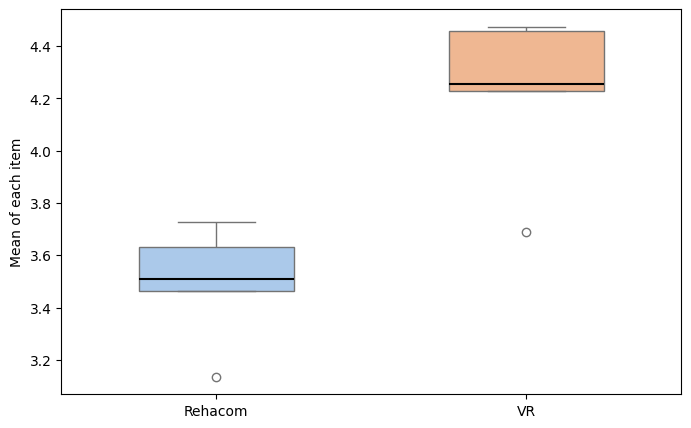

In [65]:
df = pd.DataFrame({
    'value': np.concatenate([reha_items, vr_items]),
    'group': np.repeat(['Rehacom', 'VR'], 4)
})

plt.figure(figsize=(8, 5))
sns.boxplot(x='group', y='value', data=df, width=0.5, palette='pastel', hue='group', legend=False, 
            showmeans=True, meanline=True, meanprops={'color': 'black', 'linewidth': '1.5', 'linestyle':'solid'}, 
            medianprops={'visible': False})

plt.xlabel('')
plt.ylabel('Mean of each item')

plt.show()

In [3]:
cursor.execute("SELECT reha_total FROM uesscores")
reha_total = cursor.fetchall()

reha_total = [item[0] for item in reha_total]
reha_mean = sum(reha_total) / len(reha_total)

reha_mean

14.03402255639098

In [4]:
cursor.execute("SELECT VR_total FROM uesscores")
VR_total = cursor.fetchall()

VR_total = [item[0] for item in VR_total]
vr_mean = sum(VR_total) / len(VR_total)

vr_mean

17.023120300751877

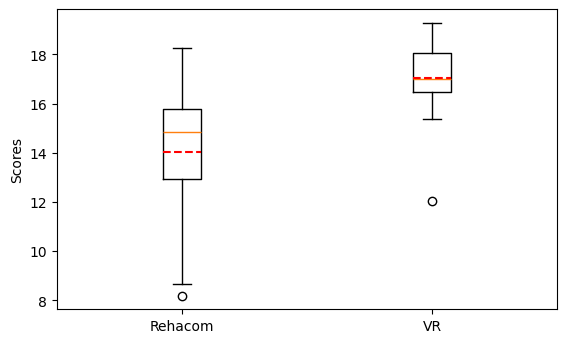

In [66]:
fig = plt.figure(figsize=(5, 3))

data = [reha_total, VR_total]

ax = fig.add_axes([0, 0, 1 ,1])
bp = ax.boxplot(data, showmeans=True, meanline=True, meanprops={'color': 'red', 'linewidth': '1.5'})

# plt.text(1, reha_mean, f'{reha_mean:.2f}', fontsize=10, ha='left', va='bottom', color='g')
# plt.text(2, vr_mean, f'{vr_mean:.2f}', fontsize=10, ha='left', va='bottom', color='g')

plt.xticks([1, 2], ['Rehacom', 'VR'])
plt.ylabel('Scores')

plt.show()

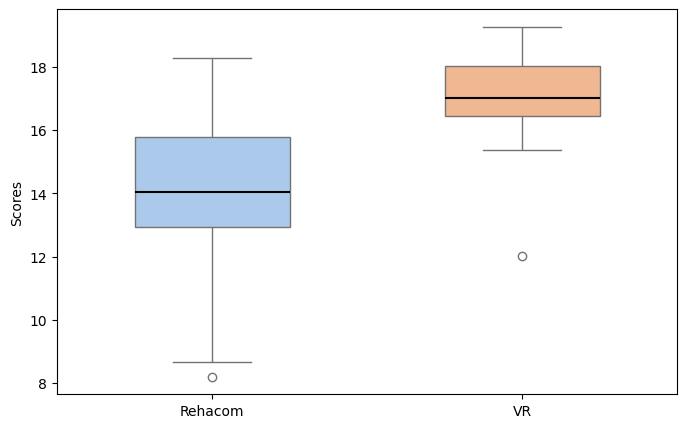

In [50]:
df = pd.DataFrame({
    'value': np.concatenate([reha_total, VR_total]),
    'group': np.repeat(['Rehacom', 'VR'], len(reha_total))
})

plt.figure(figsize=(8, 5))
sns.boxplot(x='group', y='value', data=df, width=0.5, palette='pastel', hue='group', legend=False, 
            showmeans=True, meanline=True, meanprops={'color': 'black', 'linewidth': '1.5', 'linestyle':'solid'}, 
            medianprops={'visible': False})

plt.xlabel('')
plt.ylabel('Scores')

plt.show()